In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from IPython.display import Markdown


## Carregando o Conjunto de Dados 

In [10]:
# titanic
df_titanic = sns.load_dataset('titanic')
display(Markdown("## Titanic dataset"))
display(df_titanic.head())

display(Markdown("### Exploração dos dados"))
df_titanic.info()

display(Markdown("### Estatísticas descritivas"))
display(df_titanic.describe())

## Titanic dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exploração dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Estatísticas descritivas

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Criando um Dicionário

In [11]:
df_dict = pd.DataFrame([
    {
        "variavel": "survied",
        "descricao": "Indica se um passageiro sobreviveu (1) ou não (0) a um evento",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "pcclass",
        "descricao": "Representa a classe em que um passageiro viajou (1ª, 2ª ou 3ª classe)",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal",
    },{
        "variavel": "sex",
        "descricao": "Indica o sexo do passageiro",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "age",
        "descricao": "Representa a idade dos passageiros em anos",
        "tipo": "Quantitativa.",
        "subtipo": "Continua",
    },{
        "variavel": "sibsp",
        "descricao": "Indica o número de irmãos ou cônjuges que um passageiro tinha a bordo do navio",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },{
        "variavel": "parch",
        "descricao": "Representa o número de pais ou filhos que um passageiro tinha a bordo do navio",
        "tipo": "Quantitativa",
        "subtipo": "Discreta",
    },{
        "variavel": "fare",
        "descricao": "Indica o valor da tarifa paga pelo passageiro para viajar no navio",
        "tipo": "Quantitativa",
        "subtipo": "Contínua.",
    },{
        "variavel": "embarked",
        "descricao": "Representa o local de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton)",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "class",
        "descricao": "Refere-se à classe do passageiro",
        "tipo": "Qualitativa",
        "subtipo": "Nominal.",
    },{
        "variavel": "who",
        "descricao": "Indica o grupo demográfico ao qual o passageiro pertence, como homem, mulher ou criança",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "adult_male",
        "descricao": "Indica se o passageiro é um adulto do sexo masculino (True ou False).",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "desck",
        "descricao": "Representa o convés onde o passageiro tinha sua cabine no navio",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "embark_town",
        "descricao": "Refere-se à cidade onde o passageiro embarcou no navio",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "alive",
        "descricao": "Indica se o passageiro estava vivo (yes) ou morto (no) após o evento, como o naufrágio do Titanic",
        "tipo": "Qualitativa",
        "subtipo": "Nominal",
    },{
        "variavel": "alone",
        "descricao": "Indica se o passageiro estava viajando sozinho (yes) ou acompanhado (no)",
        "tipo": "Qualitativo",
        "subtipo": "Nominal"
    }

])

df_dict

,variavel,descricao,tipo,subtipo
0,survied,Indica se um passageiro sobreviveu (1) ou não ...,Qualitativa,Nominal
1,pcclass,Representa a classe em que um passageiro viajo...,Qualitativa,Ordinal
2,sex,Indica o sexo do passageiro,Qualitativa,Nominal
3,age,Representa a idade dos passageiros em anos,Quantitativa.,Continua
4,sibsp,Indica o número de irmãos ou cônjuges que um p...,Quantitativa,Discreta
5,parch,Representa o número de pais ou filhos que um p...,Quantitativa,Discreta
6,fare,Indica o valor da tarifa paga pelo passageiro ...,Quantitativa,Contínua.
7,embarked,Representa o local de embarque do passageiro (...,Qualitativa,Nominal
8,class,Refere-se à classe do passageiro,Qualitativa,Nominal.
9,who,Indica o grupo demográfico ao qual o passageir...,Qualitativa,Nominal


## Dados Qualitativos 

KeyError: 'survied'

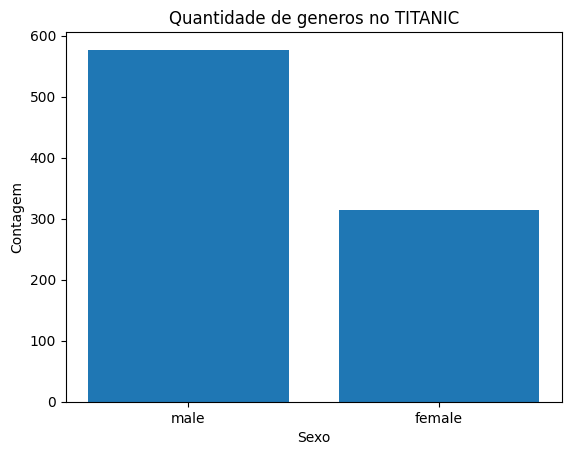

In [33]:


plt.bar(df_titanic['sex'].unique(), df_titanic['sex'].value_counts())
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Quantidade de generos no TITANIC')
#plt.show()



plt.bar(df_titanic['survied'].unique(), df_titanic['survied'].value_counts())
plt.xlabel('Sobreviventes')
plt.ylabel('Contagem')
plt.title('Quantidade de generos no TITANIC')
#plt.show()



plt.bar(df_titanic['class'].unique(), df_titanic['class'].value_counts())
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Quantidade de generos no TITANIC')
plt.show()



## Descrevendo os dados usando estatisticas central e dispersão (DADOS QUANTATIVOS)

In [3]:
print("Media:", df_titanic['bill_length_mm'].mean().round(2))
print("Mediana:", df_titanic['bill_length_mm'].median())
print("Moda:", df_titanic['bill_length_mm'].mode())
print("Amplitude:", df_titanic['bill_length_mm'].max() - df_titanic['bill_length_mm'].min())
print("Variância:", df_titanic['bill_length_mm'].var().round(2))
print("Desvio Padrão:", df_titanic['bill_length_mm'].std().round(2))

KeyError: 'bill_length_mm'